# Qiskit Implementation for Grover Search

## An Example of 2-qubit Grover Search

### Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

### Initialization circuit

It Applies H gates to Input qubits and changes the state of the ancilla bit to $|-\rangle$ 

In [2]:
def initialization(circuit):
    # Initialization
    n = circuit.num_qubits
    # For input qubits
    for qubit in range(n-1):
        circuit.h(qubit)
    # For the ancilla bit
    circuit.x(n-1)
    circuit.h(n-1)
    circuit.barrier()

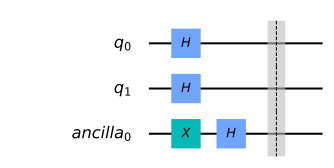

In [3]:
n = 2
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
initialization_circuit = QuantumCircuit(qr, anc)

initialization(initialization_circuit)
initialization_circuit.draw('mpl')

### Oracle circuit
It changes the phase of the "good" state. In this case, the "good" state $|10\rangle$. 

In [4]:
def oracle(circuit):
    circuit.x(1)
    circuit.ccx(0,1,2)
    circuit.x(1)
    circuit.barrier()

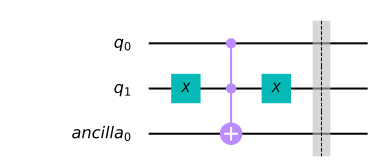

In [5]:
n = 2
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
oracle_circuit = QuantumCircuit(qr, anc)

oracle(oracle_circuit)
oracle_circuit.draw('mpl')

### Diffusion circuit
A circuit for the inversion about the mean.

In [6]:
def diffusion(circuit):
    input_qubits = circuit.num_qubits -1 
    circuit.h(range(0, input_qubits))
    circuit.x(range(0, input_qubits))
    circuit.h(input_qubits-1)
    circuit.mct([i for i in range(0, input_qubits-1)], input_qubits-1)
    circuit.h(input_qubits-1)
    circuit.x(range(0, input_qubits))
    circuit.h(range(0, input_qubits))
    circuit.barrier()

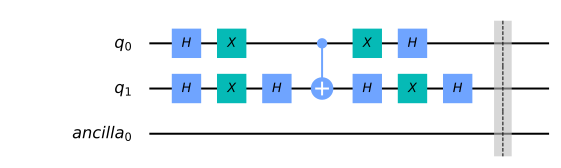

In [7]:
n = 2
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
diffusion_circuit = QuantumCircuit(qr, anc)

diffusion(diffusion_circuit)
diffusion_circuit.draw('mpl')

### Let's try 2-qubit Grover search

In [8]:
n = 2
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
grover_circuit = QuantumCircuit(qr, anc)

#### Grover search

In [9]:
# the number of iterations
num_iterations = 1

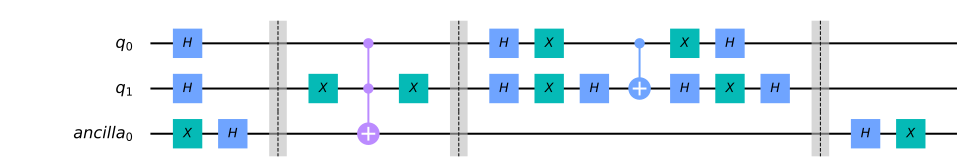

In [10]:
# Let's do Grover search
initialization(grover_circuit)

for i in range(0, num_iterations):
    oracle(grover_circuit)
    diffusion(grover_circuit)
    
# Clear the ancilla bit
grover_circuit.h(n)
grover_circuit.x(n)

    
grover_circuit.draw('mpl')

### Experiment with Simulators

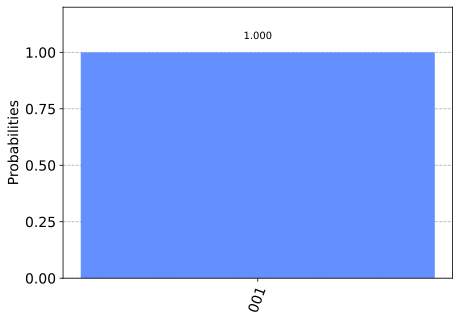

In [11]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

We got the correct answer $|10\rangle$. Note that be careful with the order of qubits

In [12]:
# Load IBM Q account and get the least busy backend device
IBMQ.load_account()
provider = IBMQ.get_provider(group = 'open')
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_burlington


In [13]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


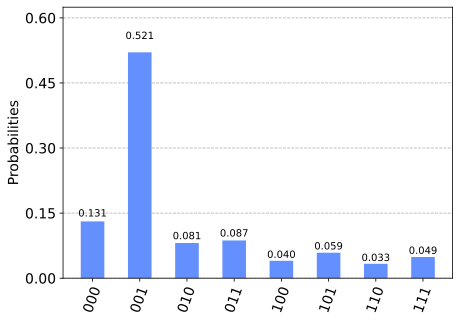

In [14]:
# Check the results of the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

## An Example of 3-qubit Grover Search

In [15]:
n = 3
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
grover_circuit = QuantumCircuit(qr, anc)

In [16]:
# the number of iterations
num_iterations = 2

In [17]:
def oracle(circuit):
    circuit.mct([0,1,2],3)
    circuit.barrier()

This time, $|111\rangle$ is the "good" state.

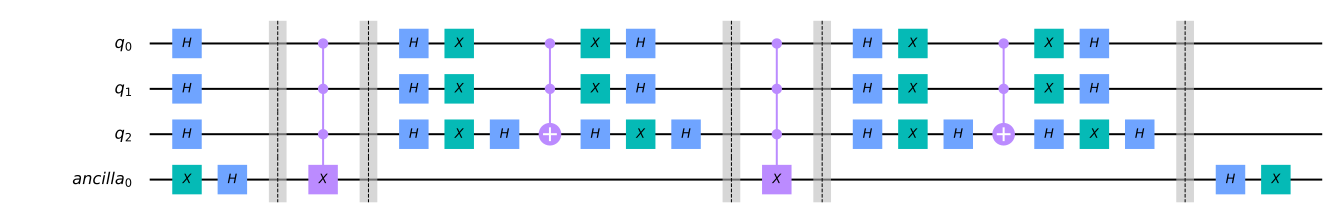

In [18]:
# Let's do Grover search
initialization(grover_circuit)

for i in range(0, num_iterations):
    oracle(grover_circuit)
    diffusion(grover_circuit)
    
# Clear the ancilla bit
grover_circuit.h(n)
grover_circuit.x(n)

    
grover_circuit.draw('mpl')

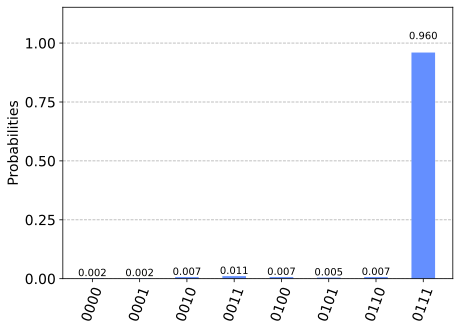

In [19]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

#### What happens if we iterate 3 times?

In [20]:
n = 3
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
grover_circuit = QuantumCircuit(qr, anc)

In [21]:
# the number of iterations
num_iterations = 3

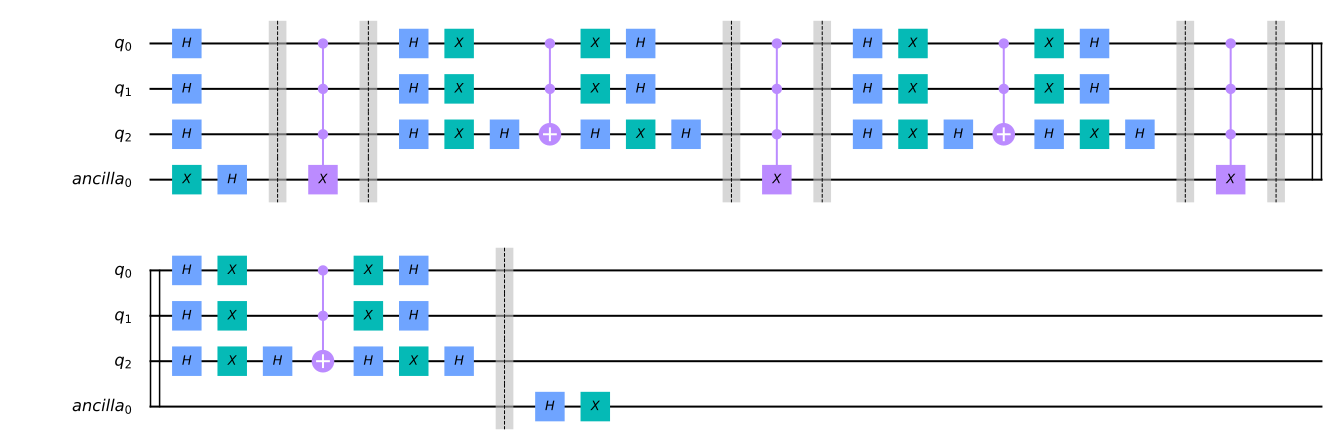

In [22]:
# Let's do Grover search
initialization(grover_circuit)

for i in range(0, num_iterations):
    oracle(grover_circuit)
    diffusion(grover_circuit)
    
# Clear the ancilla bit
grover_circuit.h(n)
grover_circuit.x(n)

    
grover_circuit.draw('mpl')

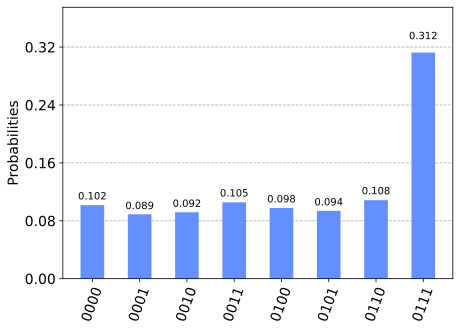

In [23]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

#### How about 4 times?

In [24]:
n = 3
qr = QuantumRegister(n, 'q')
anc = QuantumRegister(1, 'ancilla')
grover_circuit = QuantumCircuit(qr, anc)

In [25]:
# the number of iterations
num_iterations = 4

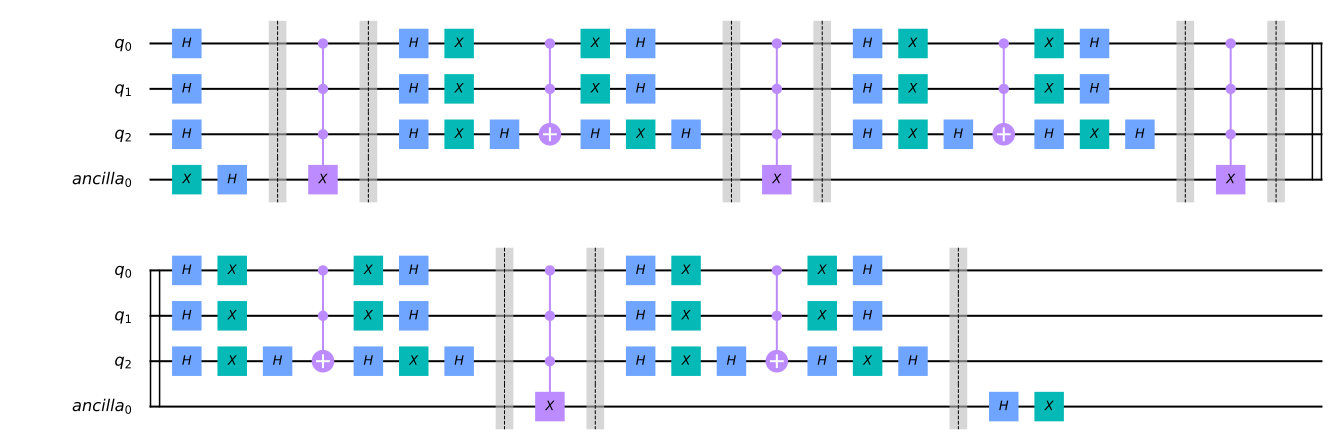

In [26]:
# Let's do Grover search
initialization(grover_circuit)

for i in range(0, num_iterations):
    oracle(grover_circuit)
    diffusion(grover_circuit)
    
# Clear the ancilla bit
grover_circuit.h(n)
grover_circuit.x(n)

    
grover_circuit.draw('mpl')

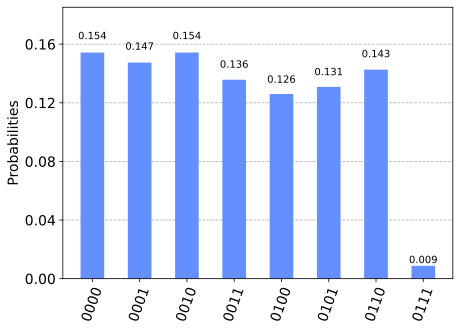

In [27]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

### Repeating appropriate times is important!